In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sklearn.__version__)

1.5.1


In [3]:
jannik_data = pd.read_csv('jannik_singles.csv')

In [4]:
jannik_data.head(5)

Surface                            Outcome_raw Outcome    DR     A%   DF%  \
0   Grass  (5)Daniil Medvedev [RUS] d. (1)Sinner       L  1.14  11.3%  2.7%   
1   Grass     (1)Sinner d. (14)Ben Shelton [USA]       W  1.51   7.8%  0.0%   
2   Grass   (1)Sinner d. Miomir Kecmanovic [SRB]       W  1.94  15.9%  2.9%   
3   Grass   (1)Sinner d. Matteo Berrettini [ITA]       W  1.29   7.4%  1.5%   
4   Grass    (1)Sinner d. Yannick Hanfmann [GER]       W  1.16  12.7%  2.4%   

   1stIn   1st%   2nd%    TPW    RPW    vA%  v1st%  v2nd%  
0  64.7%  80.4%  52.8%  50.6%  33.3%   8.6%  23.5%  54.5%  
1  70.0%  76.2%  70.4%  55.9%  38.5%  15.6%  30.4%  59.3%  
2  60.9%  85.7%  66.7%  60.0%  42.3%   2.8%  26.7%  69.2%  
3  65.2%  81.8%  53.2%  52.5%  36.4%  17.3%  29.3%  54.3%  
4  57.9%  79.5%  49.1%  53.3%  38.6%  10.5%  32.1%  52.8%

In [5]:
jannik_data = jannik_data.sample(frac=1).reset_index(drop=True)

In [6]:
jannik_data.shape

(420, 14)

In [7]:
jannik_data = jannik_data.dropna()

In [8]:
jannik_data.shape

(358, 14)

In [9]:
jannik_data.describe()

DR
count  358.000000
mean     1.334218
std      0.581224
min      0.000000
25%      0.972500
50%      1.240000
75%      1.570000
max      5.840000

In [10]:
for col in jannik_data.columns:
    print(jannik_data[col].dtype)

object
object
object
float64
object
object
object
object
object
object
object
object
object
object


In [11]:
for col in jannik_data.columns:
    if col not in ['Surface', 'Outcome_raw', 'Outcome', 'DR']:
        if jannik_data[col] is not (int or float):
            jannik_data[col] = jannik_data[col].astype('str')
            jannik_data[col] = jannik_data[col].str.rstrip('%').astype('float') / 100.0
        else:
            jannik_data[col] = jannik_data[col].astype('float')
#jannik_data['Win%'] = jannik_data['Win%'].str.rstrip('%').astype('float') / 100.0
#jannik_data['DR'] = jannik_data['DR'].astype('float')

In [12]:
jannik_data.head()

Surface                            Outcome_raw Outcome    DR     A%    DF%  \
0    Clay    Sinner d. (6)Alexander Zverev [GER]       W  1.07  0.021  0.042   
1    Clay   (LL)Sinner d. (WC)Mate Valkusz [HUN]       W  0.98  0.015  0.029   
2    Hard  (4)Sinner d. (3)Daniil Medvedev [RUS]       W  1.15  0.096  0.019   
3   Grass              Alex Bolt [AUS] d. Sinner       L  1.06  0.149  0.052   
6    Hard  (3)Sinner d. Thanasi Kokkinakis [AUS]       W  2.14  0.064  0.000   

   1stIn   1st%   2nd%    TPW    RPW    vA%  v1st%  v2nd%  
0  0.566  0.716  0.532  0.530  0.389  0.028  0.282  0.595  
1  0.529  0.667  0.313  0.493  0.488  0.024  0.500  0.464  
2  0.577  0.833  0.477  0.536  0.364  0.114  0.200  0.636  
3  0.575  0.779  0.456  0.504  0.380  0.113  0.260  0.593  
6  0.617  0.759  0.722  0.648  0.545  0.159  0.423  0.722

In [13]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
jannik_data['Outcome'] = label_encoding.fit_transform(jannik_data['Outcome'].astype(str))

In [14]:
jannik_data.head()

Surface                            Outcome_raw  Outcome    DR     A%    DF%  \
0    Clay    Sinner d. (6)Alexander Zverev [GER]        1  1.07  0.021  0.042   
1    Clay   (LL)Sinner d. (WC)Mate Valkusz [HUN]        1  0.98  0.015  0.029   
2    Hard  (4)Sinner d. (3)Daniil Medvedev [RUS]        1  1.15  0.096  0.019   
3   Grass              Alex Bolt [AUS] d. Sinner        0  1.06  0.149  0.052   
6    Hard  (3)Sinner d. Thanasi Kokkinakis [AUS]        1  2.14  0.064  0.000   

   1stIn   1st%   2nd%    TPW    RPW    vA%  v1st%  v2nd%  
0  0.566  0.716  0.532  0.530  0.389  0.028  0.282  0.595  
1  0.529  0.667  0.313  0.493  0.488  0.024  0.500  0.464  
2  0.577  0.833  0.477  0.536  0.364  0.114  0.200  0.636  
3  0.575  0.779  0.456  0.504  0.380  0.113  0.260  0.593  
6  0.617  0.759  0.722  0.648  0.545  0.159  0.423  0.722

In [15]:
jannik_data = pd.get_dummies(jannik_data, columns=['Surface'])
jannik_data.head()

Outcome_raw  Outcome    DR     A%    DF%  1stIn  \
0    Sinner d. (6)Alexander Zverev [GER]        1  1.07  0.021  0.042  0.566   
1   (LL)Sinner d. (WC)Mate Valkusz [HUN]        1  0.98  0.015  0.029  0.529   
2  (4)Sinner d. (3)Daniil Medvedev [RUS]        1  1.15  0.096  0.019  0.577   
3              Alex Bolt [AUS] d. Sinner        0  1.06  0.149  0.052  0.575   
6  (3)Sinner d. Thanasi Kokkinakis [AUS]        1  2.14  0.064  0.000  0.617   

    1st%   2nd%    TPW    RPW    vA%  v1st%  v2nd%  Surface_Clay  \
0  0.716  0.532  0.530  0.389  0.028  0.282  0.595          True   
1  0.667  0.313  0.493  0.488  0.024  0.500  0.464          True   
2  0.833  0.477  0.536  0.364  0.114  0.200  0.636         False   
3  0.779  0.456  0.504  0.380  0.113  0.260  0.593         False   
6  0.759  0.722  0.648  0.545  0.159  0.423  0.722         False   

   Surface_Grass  Surface_Hard  
0          False         False  
1          False         False  
2          False          True  
3           True         False  
6          False          True

In [16]:
jannik_data = jannik_data.drop(['Outcome_raw'], axis=1)
jannik_data['Surface_Clay'] = label_encoding.fit_transform(jannik_data['Surface_Clay'].astype(str))
jannik_data['Surface_Grass'] = label_encoding.fit_transform(jannik_data['Surface_Grass'].astype(str))
jannik_data['Surface_Hard'] = label_encoding.fit_transform(jannik_data['Surface_Hard'].astype(str))
jannik_data.head()

Outcome    DR     A%    DF%  1stIn   1st%   2nd%    TPW    RPW    vA%  \
0        1  1.07  0.021  0.042  0.566  0.716  0.532  0.530  0.389  0.028   
1        1  0.98  0.015  0.029  0.529  0.667  0.313  0.493  0.488  0.024   
2        1  1.15  0.096  0.019  0.577  0.833  0.477  0.536  0.364  0.114   
3        0  1.06  0.149  0.052  0.575  0.779  0.456  0.504  0.380  0.113   
6        1  2.14  0.064  0.000  0.617  0.759  0.722  0.648  0.545  0.159   

   v1st%  v2nd%  Surface_Clay  Surface_Grass  Surface_Hard  
0  0.282  0.595             1              0             0  
1  0.500  0.464             1              0             0  
2  0.200  0.636             0              0             1  
3  0.260  0.593             0              1             0  
6  0.423  0.722             0              0             1

Text(0.5, 0, 'Dominance R')

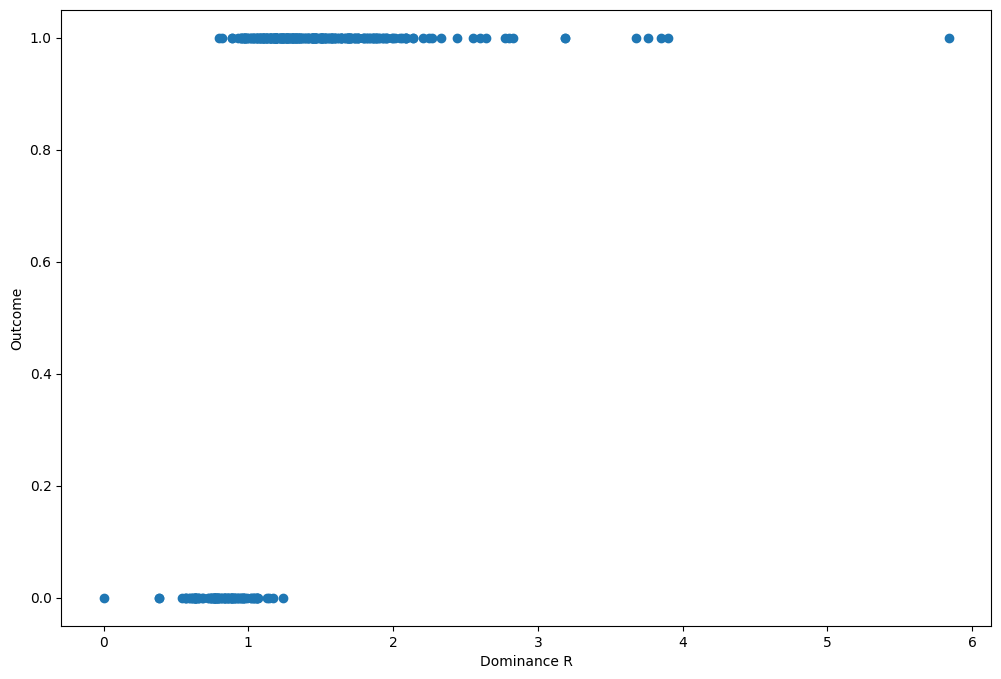

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(jannik_data['DR'], jannik_data['Outcome'])
plt.ylabel('Outcome')
plt.xlabel('Dominance R')

In [18]:
#jannik_data_nostring = jannik_data.drop(['Opponent', 'First Match', 'Last Match'], axis=1)
#jannik_data_nostring = jannik_data_nostring.drop(['W', 'L', 'TB', 'TBW', 'TBL', 'MS'], axis=1)
jannik_h2h_corr = jannik_data.corr()
jannik_h2h_corr

Outcome        DR        A%       DF%     1stIn      1st%  \
Outcome        1.000000  0.541625  0.274788 -0.096421  0.076742  0.530198   
DR             0.541625  1.000000  0.262266 -0.107206  0.087803  0.650112   
A%             0.274788  0.262266  1.000000 -0.033573  0.111099  0.547413   
DF%           -0.096421 -0.107206 -0.033573  1.000000 -0.320505 -0.059324   
1stIn          0.076742  0.087803  0.111099 -0.320505  1.000000 -0.000091   
1st%           0.530198  0.650112  0.547413 -0.059324 -0.000091  1.000000   
2nd%           0.427771  0.661020  0.165553 -0.216428  0.052163  0.385676   
TPW            0.747860  0.852742  0.277070 -0.113087  0.046279  0.668962   
RPW            0.541147  0.592257 -0.022970  0.036691 -0.125485  0.204162   
vA%           -0.171661 -0.160542  0.110789 -0.116001  0.190311  0.080017   
v1st%          0.454343  0.489118 -0.030275 -0.008936 -0.142318  0.158620   
v2nd%          0.374815  0.432607  0.031958  0.065826 -0.023954  0.172253   
Surface_Clay  -0.087224 -0.058762 -0.366482  0.026113 -0.099772 -0.307833   
Surface_Grass -0.042676 -0.008756  0.177411  0.011469  0.040971  0.088002   
Surface_Hard   0.105539  0.058708  0.222342 -0.030786  0.065072  0.224578   

                   2nd%       TPW       RPW       vA%     v1st%     v2nd%  \
Outcome        0.427771  0.747860  0.541147 -0.171661  0.454343  0.374815   
DR             0.661020  0.852742  0.592257 -0.160542  0.489118  0.432607   
A%             0.165553  0.277070 -0.022970  0.110789 -0.030275  0.031958   
DF%           -0.216428 -0.113087  0.036691 -0.116001 -0.008936  0.065826   
1stIn          0.052163  0.046279 -0.125485  0.190311 -0.142318 -0.023954   
1st%           0.385676  0.668962  0.204162  0.080017  0.158620  0.172253   
2nd%           1.000000  0.590606  0.208307 -0.004858  0.176610  0.177494   
TPW            0.590606  1.000000  0.775115 -0.252242  0.654312  0.553162   
RPW            0.208307  0.775115  1.000000 -0.519727  0.850553  0.684465   
vA%           -0.004858 -0.252242 -0.519727  1.000000 -0.526952 -0.231282   
v1st%          0.176610  0.654312  0.850553 -0.526952  1.000000  0.252721   
v2nd%          0.177494  0.553162  0.684465 -0.231282  0.252721  1.000000   
Surface_Clay  -0.114997 -0.081403  0.144172 -0.341407  0.184852 -0.005025   
Surface_Grass  0.078256 -0.048060 -0.125016  0.135871 -0.134373 -0.017023   
Surface_Hard   0.055768  0.103597 -0.053241  0.225353 -0.084328  0.015107   

               Surface_Clay  Surface_Grass  Surface_Hard  
Outcome           -0.087224      -0.042676      0.105539  
DR                -0.058762      -0.008756      0.058708  
A%                -0.366482       0.177411      0.222342  
DF%                0.026113       0.011469     -0.030786  
1stIn             -0.099772       0.040971      0.065072  
1st%              -0.307833       0.088002      0.224578  
2nd%              -0.114997       0.078256      0.055768  
TPW               -0.081403      -0.048060      0.103597  
RPW                0.144172      -0.125016     -0.053241  
vA%               -0.341407       0.135871      0.225353  
v1st%              0.184852      -0.134373     -0.084328  
v2nd%             -0.005025      -0.017023      0.015107  
Surface_Clay       1.000000      -0.183545     -0.792969  
Surface_Grass     -0.183545       1.000000     -0.453365  
Surface_Hard      -0.792969      -0.453365      1.000000

In [19]:
jannik_data.shape

(358, 15)

<Axes: >

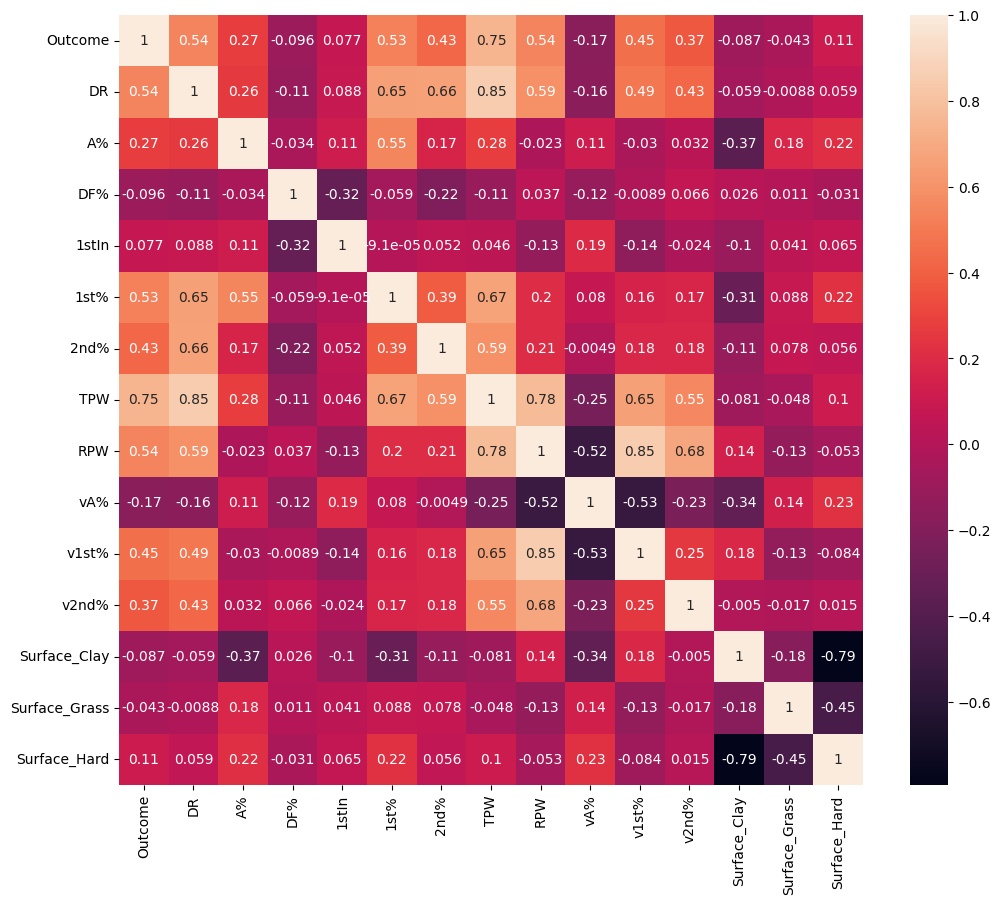

In [20]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(jannik_h2h_corr, annot=True)

In [21]:
from sklearn.model_selection import train_test_split
#jannik_data_nostring = jannik_data_nostring.drop(['H2Hs', 'DF%', '1stIn', 'BPSvd%', 'BPCnv%'], axis=1)
X = jannik_data.drop(['Outcome'], axis=1)
Y = jannik_data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

<Axes: >

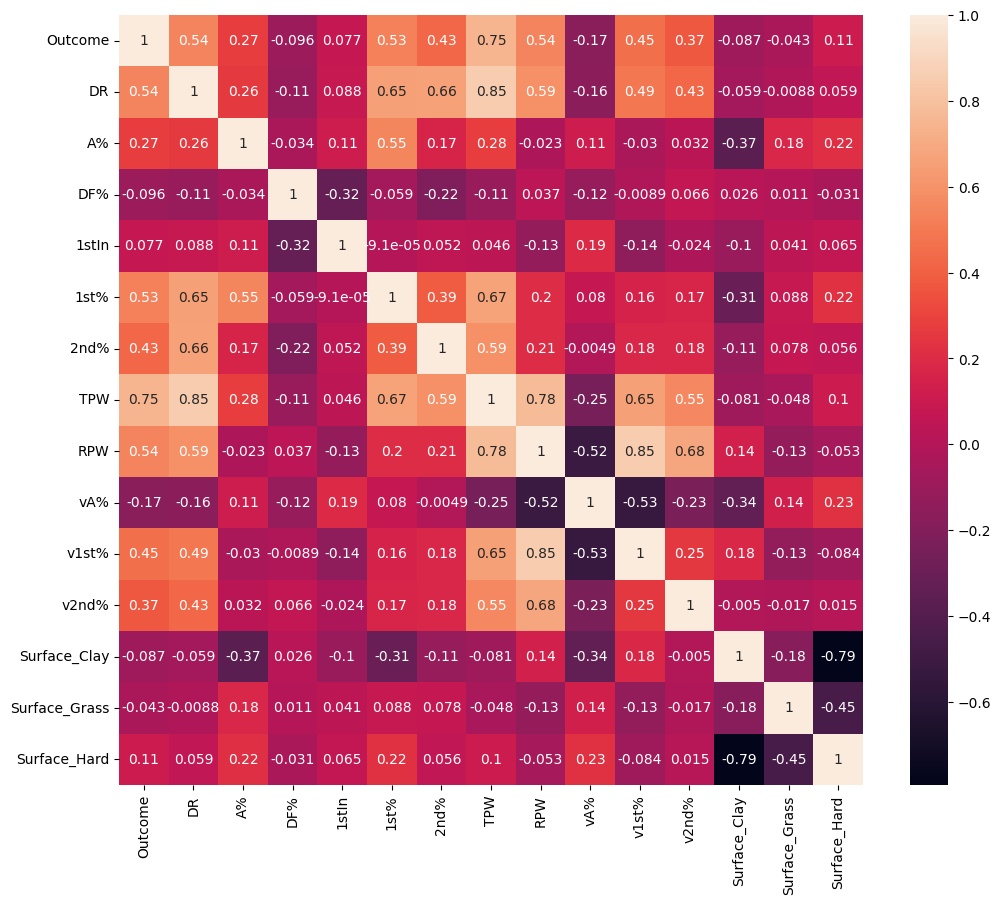

In [22]:
jannik_h2h_corr = jannik_data.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(jannik_h2h_corr, annot=True)

In [23]:
x_train.sample(5)

DR     A%    DF%  1stIn   1st%   2nd%    TPW    RPW    vA%  v1st%  \
183  0.84  0.056  0.019  0.620  0.672  0.463  0.471  0.343  0.098  0.280   
299  1.07  0.138  0.013  0.675  0.722  0.538  0.495  0.363  0.069  0.242   
66   0.95  0.044  0.029  0.662  0.733  0.304  0.472  0.389  0.105  0.290   
154  1.28  0.059  0.074  0.559  0.737  0.400  0.559  0.525  0.017  0.281   
256  1.06  0.050  0.020  0.650  0.646  0.571  0.519  0.404  0.022  0.367   

     v2nd%  Surface_Clay  Surface_Grass  Surface_Hard  
183  0.519             1              0             0  
299  0.583             0              0             1  
66   0.576             1              0             0  
154  0.815             1              0             0  
256  0.483             0              0             1

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
mlp_cla = MLPClassifier(hidden_layer_sizes=(10, ),
                        activation = 'relu',
                        alpha = 0.0001,
                        solver='lbfgs', 
                        verbose=True,
                        max_iter=600)

In [28]:
mlp_cla.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=600, solver='lbfgs',
              verbose=True)

In [29]:
y_pred = mlp_cla.predict(x_test)

In [30]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})
pred_results.sample(10)

y_test  y_pred
212       1       1
130       1       1
418       1       1
40        1       1
179       1       1
165       1       1
116       1       1
7         1       1
393       1       1
386       1       0

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9305555555555556

In [32]:
data_crosstab = pd.crosstab(pred_results.y_test, pred_results.y_pred)
data_crosstab

y_pred   0   1
y_test        
0       10   3
1        2  57

In [33]:
#from sklearn.metrics import r2_score

In [34]:
#mlp_reg.score(x_train, y_train)

In [35]:
#r2_score(y_test, y_pred)
# an r2 score is not fit for classification datasets

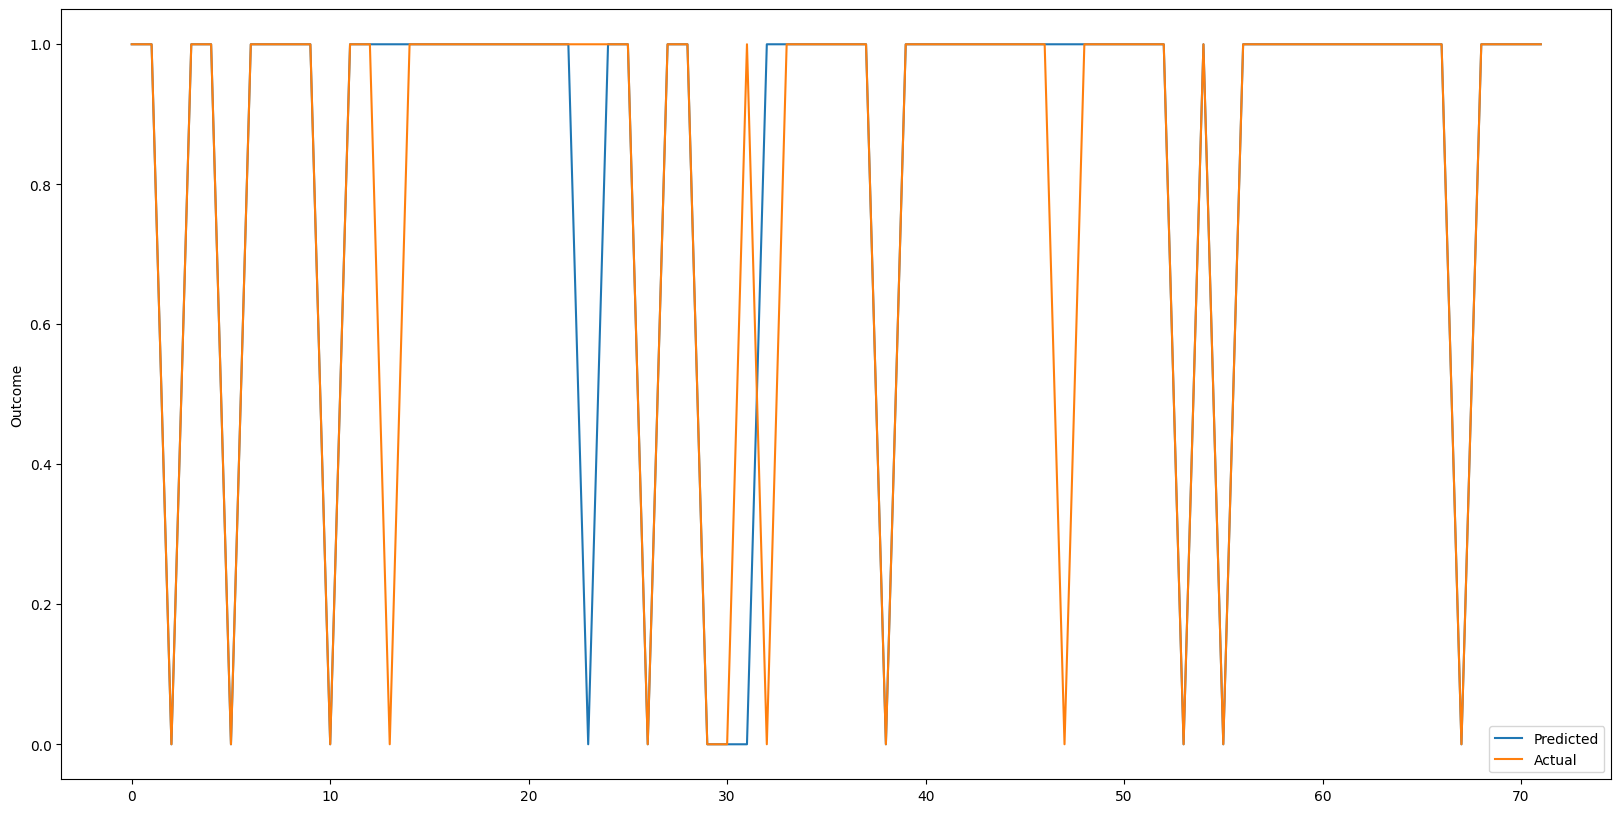

In [36]:
plt.figure(figsize = (20, 10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Outcome')

plt.legend()
plt.show()